In [59]:
from tensorflow.keras.layers import Dense, InputLayer, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, RocCurveDisplay, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [61]:
df_train = pd.read_csv("../Data/Train.csv")
X_train, X_val, y_train, y_val = train_test_split(df_train.article, df_train.label, 
                                                     test_size=0.2, stratify=df_train.label, 
                                                     random_state=42)

In [62]:
vectorizer = TfidfVectorizer(max_features=20365)
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec =  vectorizer.transform(X_val)
with open('../tools/saved_vectorizer_v2.pkl', 'wb') as file:
    vectorizer = pickle.dump(vectorizer, file)

In [63]:
early_stop =  EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [64]:
model = Sequential()
model.add(InputLayer(shape=[X_train_vec.shape[1],]))
model.add(Dense(20, activation='relu', kernel_regularizer=regularizers.l2(0.000001)))
model.add(Dropout(0.75))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=1e-3),loss=BinaryCrossentropy(), metrics=['accuracy'])

In [65]:
history = model.fit(X_train_vec, y_train, validation_data=[X_val_vec, y_val], epochs = 30, shuffle=True, callbacks =[early_stop])

Epoch 1/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5905 - loss: 0.6843 - val_accuracy: 0.8970 - val_loss: 0.6287
Epoch 2/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8297 - loss: 0.6019 - val_accuracy: 0.9228 - val_loss: 0.5360
Epoch 3/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8963 - loss: 0.5037 - val_accuracy: 0.9307 - val_loss: 0.4477
Epoch 4/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9128 - loss: 0.4285 - val_accuracy: 0.9446 - val_loss: 0.3772
Epoch 5/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9324 - loss: 0.3489 - val_accuracy: 0.9446 - val_loss: 0.3228
Epoch 6/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9336 - loss: 0.3005 - val_accuracy: 0.9446 - val_loss: 0.2828
Epoch 7/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9405 - loss: 0.2528 - val_accuracy: 0.9446 - val_loss: 0.2543
Epoch 8/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9430 - loss: 0.2277 - val_accuracy: 0.9446 - val_loss:

In [66]:
model.save("../Models/Fake_news_detect_v6.keras")

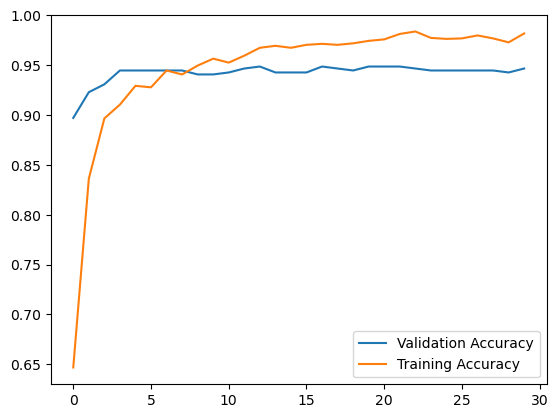

In [68]:
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.legend()
plt.show()

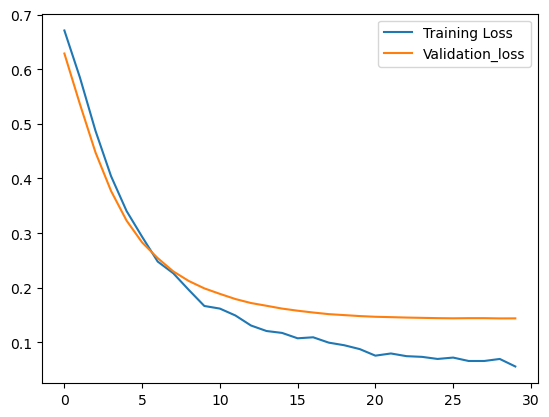

In [69]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation_loss')
plt.legend()
plt.show()